# Seaborn에 관한 기본 테스트

### Seaborn에 관하여     
- seaborn은 matplotlib의 상위 호환 데이터 시각화를 위한 라이브러리이다.  
- 데이터프레임으로 다양한 통계 지표를 낼 수 있는 시각화 차트를 제공하기 때문에 
- 데이터 분석에 활발히 사용되고 있는 라이브러리입니다. 


- 기본적인 시각화 기능은 Matplotlib 패키지에 의존하며   
- 통계 기능은 Statsmodels 패키지에 의존한다.  
- Seaborn에 대한 자세한 내용은 다음 웹사이트를 참조한다.   
  - 참고주소 : http://seaborn.pydata.org/ 
  - 각종 제공되는 그래픽 샘플 : http://seaborn.pydata.org/examples/anscombes_quartet.html  


- 개념설명 참고자료 : https://pinkwink.kr/955  
- 시각화 활용예 : 시각화 설명 : https://datascienceschool.net/01%20python/05.04%20%EC%8B%9C%EB%B3%B8%EC%9D%84%20%EC%82%AC%EC%9A%A9%ED%95%9C%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%ED%8F%AC%20%EC%8B%9C%EA%B0%81%ED%99%94.html  

- 활용 예 : https://teddylee777.github.io/visualization/seaborn-tutorial-1 (관련 참조요망)  

In [1]:
%load_ext watermark
%watermark -v -p numpy,scipy,sklearn,pandas,matplotlib

CPython 3.8.3
IPython 7.16.1

numpy 1.18.5
scipy 1.5.0
sklearn 0.23.1
pandas 1.0.5
matplotlib 3.2.2


## Seaborn Site의 기본예제로 그려본 그림입니다.  

In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set_style("whitegrid")

# Load the example dataset for Anscombe's quartet
tips = sns.load_dataset("tips")   # Seaborn에 있는 샘플 데이터중 tips(흡연자료에 대한 분석자료)
tips.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


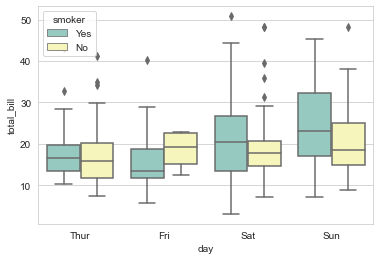

In [3]:
sns.boxplot(x="day", y="total_bill", hue="smoker", data=tips, palette="Set3") 
plt.show()

In [4]:
iris = sns.load_dataset("iris")          # 붓꽃 데이터
titanic = sns.load_dataset("titanic")    # 타이타닉호 데이터
tips = sns.load_dataset("tips")          # 팁 데이터
flights = sns.load_dataset("flights")    # 여객운송 데이터

### 1차원 실수 분포 플롯¶
- 실수 분포 플롯은 자료의 분포를 묘사하기 위한 것으로 
  - Matplotlib의 단순한 히스토그램과 달리 커널 밀도(kernel density) 및 러그(rug) 표시 기능 및 다차원 복합 분포 기능 등을 제공한다. 
  - 1차원 실수 분포 플롯 명령에는 rugplot, kdeplot, distplot이 있다.


- 러그(rug) 플롯은 데이터 위치를 x축 위에 작은 선분(rug)으로 나타내어 실제 데이터들의 위치를 보여준다.
- rugplot: http://seaborn.pydata.org/generated/seaborn.rugplot.html

### 한글서체 세팅  
- matplotlib에서는 기본적으로 한글이 지원되지 않는다.  
- 작업을 하기전에 먼저 
  - matplotlib의 폰트를 변경해야 한다.   
  - 아래의 소스를 통해서 변경할 수가 있고  
  - 그 중에 Windows부분을 보면 맑은고딕체로 기본 서체가 적용된 것을 확인할 수가 있다.  
- MatPlotLib에서 한글 폰트 세팅에 관한 설명 
  - 참고주소 : https://financedata.github.io/posts/matplotlib-hangul-for-windows-anaconda.html  

In [5]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

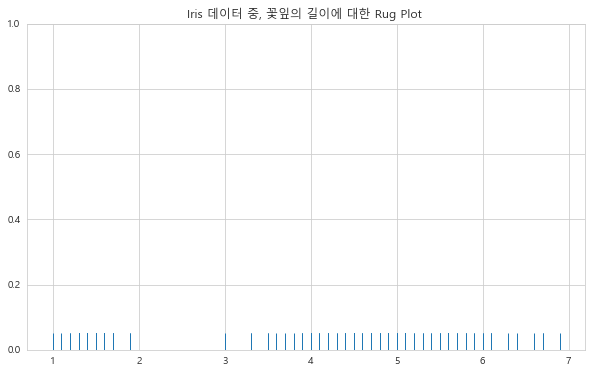

In [6]:
x = iris.petal_length.values

plt.figure(figsize=(10,6))

sns.rugplot(x)
plt.title("Iris 데이터 중, 꽃잎의 길이에 대한 Rug Plot ")
plt.show()

- 커널 밀도(kernel density)는 커널이라는 함수를 겹치는 방법으로 히스토그램보다 부드러운 형태의 분포 곡선을 보여주는 방법이다.

- kdeplot: http://seaborn.pydata.org/generated/seaborn.kdeplot.html

- 커널 밀도 추정에 대한 자세한 내용은 scikit-learn 패키지를 참조한다.
  http://scikit-learn.org/stable/modules/density.html

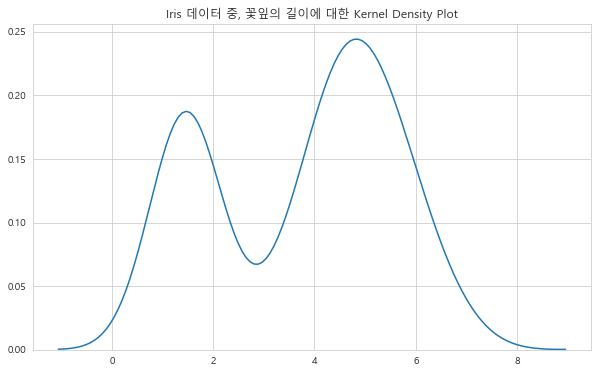

In [7]:
plt.figure(figsize=(10,6))

sns.kdeplot(x)
plt.title("Iris 데이터 중, 꽃잎의 길이에 대한 Kernel Density Plot")
plt.show()

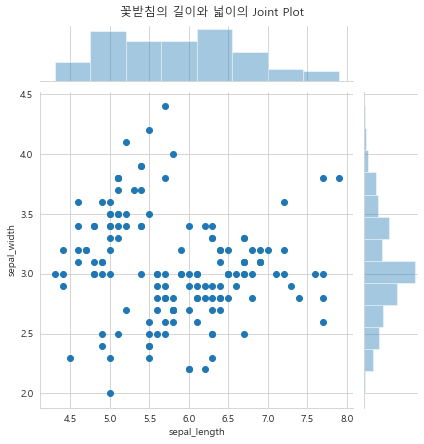

In [8]:
# plt.figure(figsize=(12,10))

sns.jointplot(x="sepal_length", y="sepal_width", data=iris)
plt.suptitle("꽃받침의 길이와 넓이의 Joint Plot", y=1.02)
plt.show()

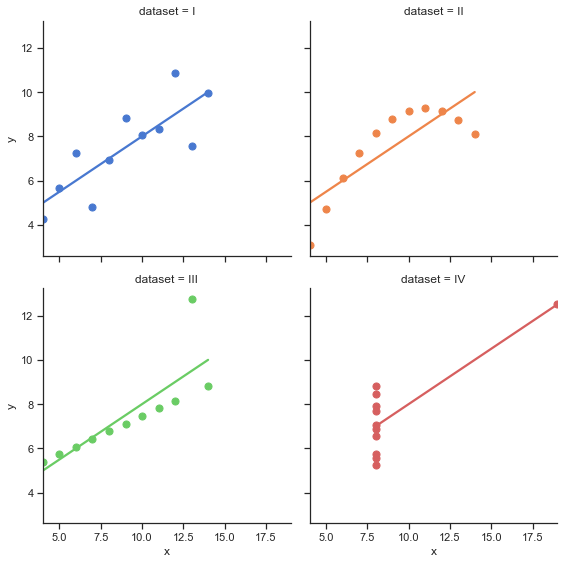

In [9]:
import seaborn as sns

sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

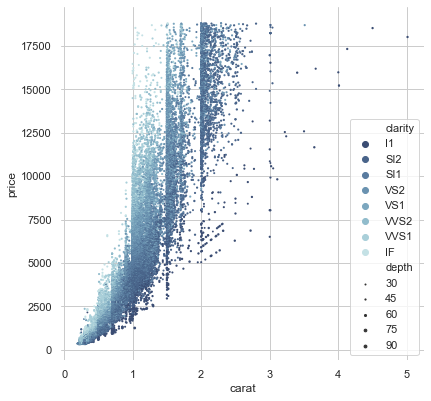

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Load the example diamonds dataset
diamonds = sns.load_dataset("diamonds")

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(x="carat", y="price",
                hue="clarity", size="depth",
                palette="ch:r=-.2,d=.3_r",
                hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=diamonds, ax=ax)

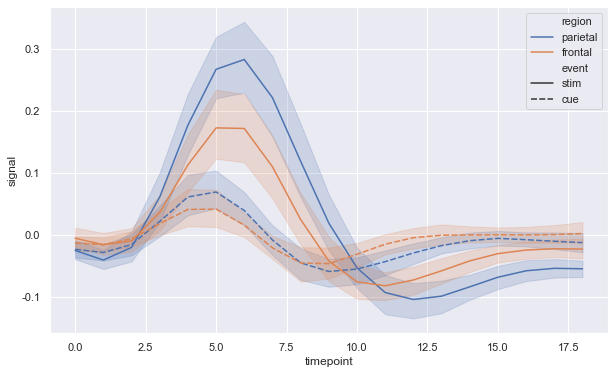

In [11]:
import seaborn as sns

plt.figure(figsize=(10,6))

sns.set(style="darkgrid")

# Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
sns.lineplot(x="timepoint", y="signal",
             hue="region", style="event",
             data=fmri)

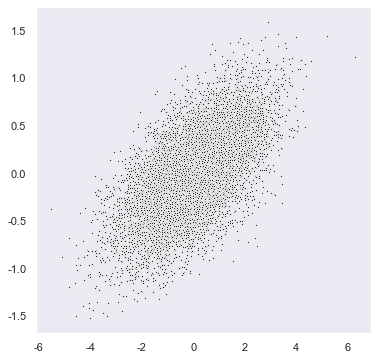

In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="dark")

# Simulate data from a bivariate Gaussian
n = 10000
mean = [0, 0]
cov = [(2, .4), (.4, .2)]
rng = np.random.RandomState(0)
x, y = rng.multivariate_normal(mean, cov, n).T

# Draw a combo histogram and scatterplot with density contours
f, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x=x, y=y, s=5, color=".15")
# sns.histplot(x=x, y=y, bins=50, pthresh=.1, cmap="mako")
# sns.kdeplot(x=x, y=y, levels=5, color="w", linewidths=1)

# Seaborn 기본 테스트 
- 참고문서 : https://teddylee777.github.io/visualization/seaborn-tutorial-1 

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# 한글 폰트 적용
plt.rc('font', family='NanumBarunGothic') 
# 캔버스 사이즈 적용
plt.rcParams["figure.figsize"] = (12, 9)

In [15]:
titanic = sns.load_dataset('titanic')   # Seaborn의 샘플 자료중 타이타닉호의 생존자 성향분석 
titanic 

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [16]:
titanic.shape 

(891, 15)

- 타이타닉에 관한 자료 설명 
  - survived: 생존여부
  - pclass: 좌석등급
  - sex: 성별
  - age: 나이
  - sibsp: 형제자매 숫자
  - parch: 부모자식 숫자
  - fare: 요금
  - embarked: 탑승 항구
  - class: 좌석등급 (영문)
  - who: 사람 구분
  - deck: 데크
  - embark_town: 탑승 항구 (영문)
  - alive: 생존여부 (영문)
  - alone: 혼자인지 여부

In [17]:
tips = sns.load_dataset('tips')
tips 

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


- 데이터 설명 
  - total_bill: 총 합계 요금표
  - tip: 팁
  - sex: 성별
  - smoker: 흡연자 여부
  - day: 요일
  - time: 식사 시간
  - size: 식사 인원
  - 1. Countplot

## 1. Countplot
- 항목별 갯수를 세어주는 countplot 입니다.
- 알아서 해당 column을 구성하고 있는 value들을 구분하여 보여줍니다. 
- countplot 공식 도큐먼트

In [18]:
# 배경을 darkgrid 로 설정
sns.set(style='darkgrid')

### 1-1 세로로 그리기

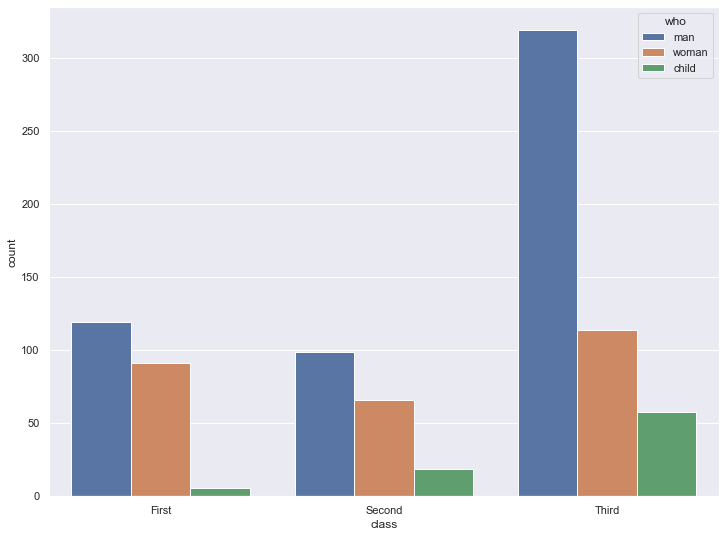

In [19]:
sns.countplot(x="class", hue="who", data=titanic)
plt.show()

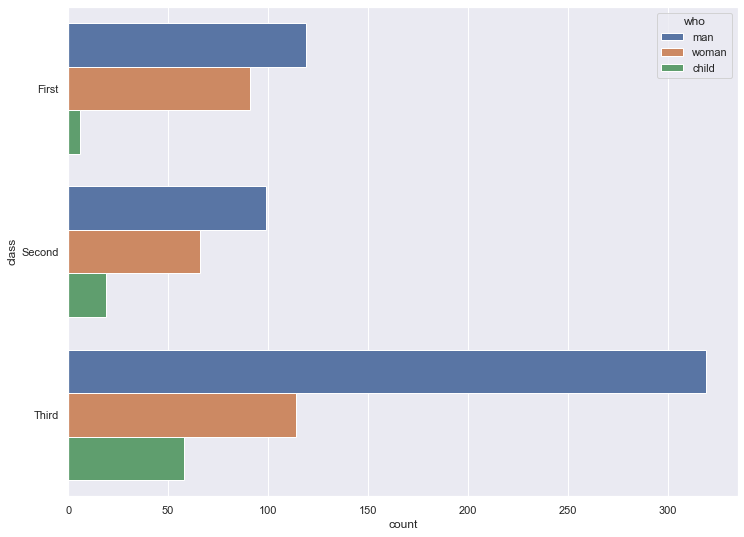

In [20]:
sns.countplot(y="class", hue="who", data=titanic)
plt.show()

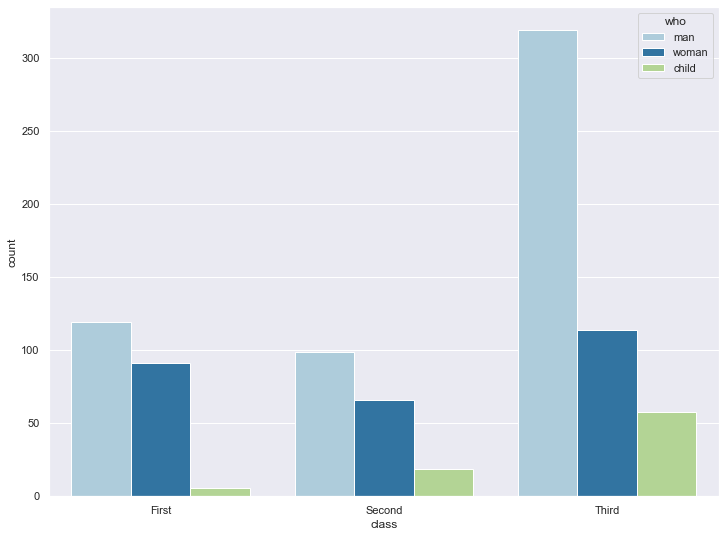

In [21]:
sns.countplot(x="class", hue="who", palette='Paired', data=titanic)
plt.show()

#### 2. distplot
- matplotlib의 hist 그래프와 kdeplot을 통합한 그래프 입니다. 
- 분포와 밀도를 확인할 수 있습니다.  
- 도큐먼트 : https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot   

In [22]:
# 샘플데이터 생성
x = np.random.randn(100)

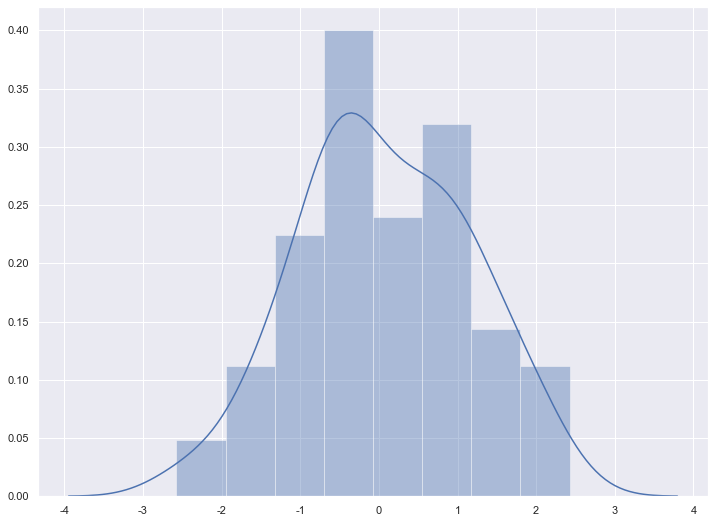

In [23]:
sns.distplot(x)
plt.show()

### 2-2. 데이터가 Series 일 경우

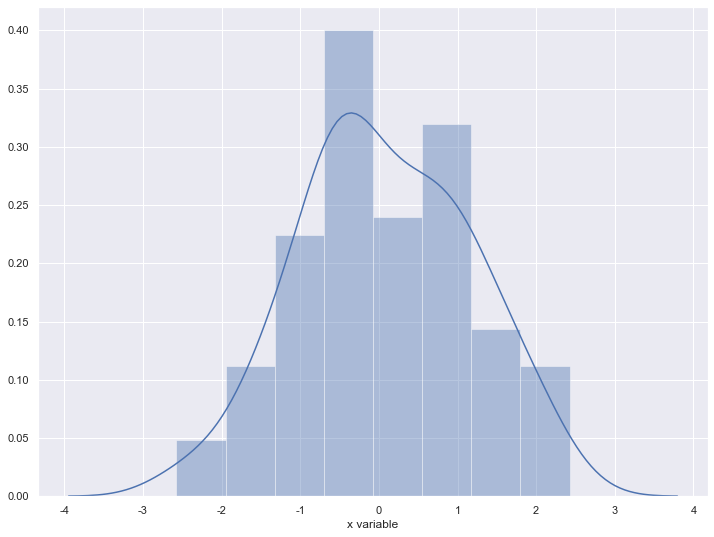

In [24]:
x = pd.Series(x, name="x variable")
sns.distplot(x)
plt.show()

### 2-3. rugplot

- rug는 rugplot이라고도 불리우며, 
  - 데이터 위치를 x축 위에 작은 선분(rug)으로 나타내어 데이터들의 위치 및 분포를 보여준다.

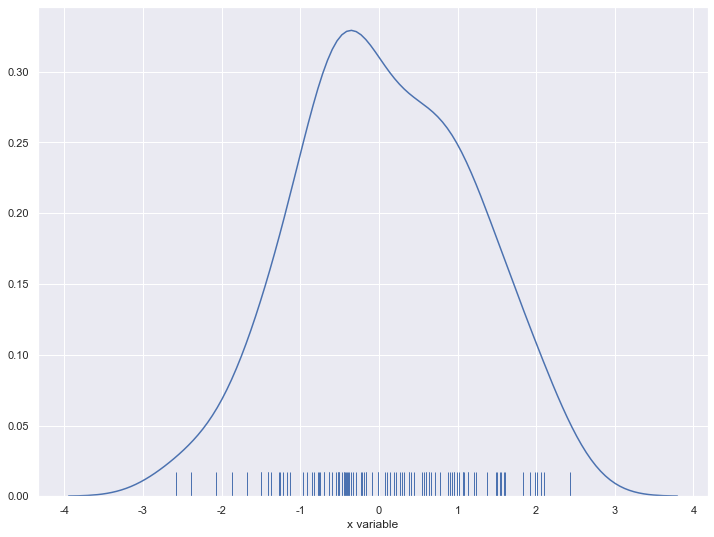

In [25]:
sns.distplot(x, rug=True, hist=False)
plt.show()